In [1]:
from sklearn.datasets import make_classification

In [2]:
import pandas as pd
import numpy as np

In [3]:
from collections import Counter

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
x,y = make_classification (n_samples=200000, n_features=30, n_informative=30,n_redundant=0, n_clusters_per_class=1,
weights=[0.99, 0.001], class_sep=0.5, random_state=0)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
print('The number of records in the training dataset is', x_train.shape[0])
print('The number of records in the test dataset is', x_test.shape[0])

The number of records in the training dataset is 160000
The number of records in the test dataset is 40000


In [9]:
x_train

array([[ 2.31430061,  4.62331529, -1.00049792, ..., -0.24566389,
        -3.83757346,  1.72628541],
       [ 1.07151655,  2.42481664, -0.45686723, ...,  1.72564142,
        -0.53243663, -5.3208564 ],
       [-2.55751016, -0.8600968 , -3.99256551, ..., -1.34381535,
        -0.16411634,  0.16272455],
       ...,
       [-3.76652097, -0.46180143,  6.30887927, ...,  0.85230717,
        -0.85510624, -2.96779288],
       [-4.88472382, -1.02458936, -2.92244663, ..., -3.0854598 ,
        -4.67225791, -2.39862079],
       [ 5.03075865,  0.28778596,  3.92013487, ...,  3.17748982,
        -8.09692272, -1.71095665]])

In [10]:
x_train.shape

(160000, 30)

In [11]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import classification_report

In [12]:
x_train_normal = x_train[np.where(y_train ==0)]
input = keras.layers. Input (shape=(30,))
encoder = Sequential([
Dense(15, activation= 'relu'),
Dense (8, activation= 'relu'),
Dense (4, activation='relu')])(input)

In [13]:
decoder = Sequential([
Dense(8, activation="relu"),
Dense(15, activation="relu"),
Dense(30, activation="sigmoid")])(encoder)

In [14]:
autoencoder = keras. Model (inputs=input, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 sequential (Sequential)     (None, 4)                 629       
                                                                 
 sequential_1 (Sequential)   (None, 30)                655       
                                                                 
Total params: 1284 (5.02 KB)
Trainable params: 1284 (5.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
autoencoder.compile(optimizer='adam', loss='mae')

In [16]:

history = autoencoder.fit(x_train_normal, x_train_normal, epochs=4,

batch_size=64,

validation_data=(x_test, x_test),

shuffle=True)

Epoch 1/4
2474/2474 [==============================] - 16s 5ms/step - loss: 2.5483 - val_loss: 2.5187
Epoch 2/4
2474/2474 [==============================] - 8s 3ms/step - loss: 2.5123 - val_loss: 2.5087
Epoch 3/4
2474/2474 [==============================] - 8s 3ms/step - loss: 2.5060 - val_loss: 2.5046
Epoch 4/4
2474/2474 [==============================] - 9s 4ms/step - loss: 2.5019 - val_loss: 2.5005


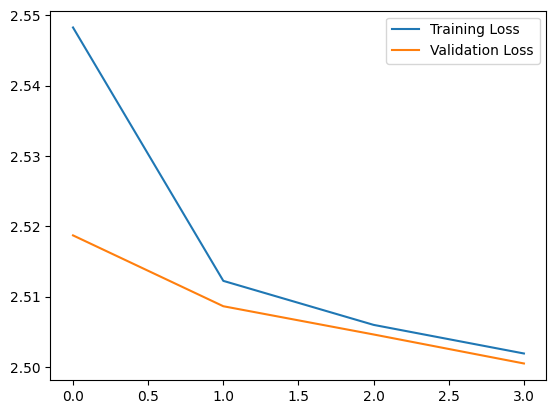

In [17]:
plt.plot(history.history["loss"], label="Training Loss")

plt.plot(history.history["val_loss"], label="Validation Loss")

plt.legend()

In [18]:
prediction=autoencoder.predict(x_test)
prediction_loss = keras.losses.mae(prediction, x_test)

1250/1250 [==============================] - 2s 2ms/step


In [19]:
loss_threshold = np.percentile(prediction_loss, 98)

print(f'The prediction loss threshold for 2% of outliers is {loss_threshold:.2f}')

The prediction loss threshold for 2% of outliers is 3.58


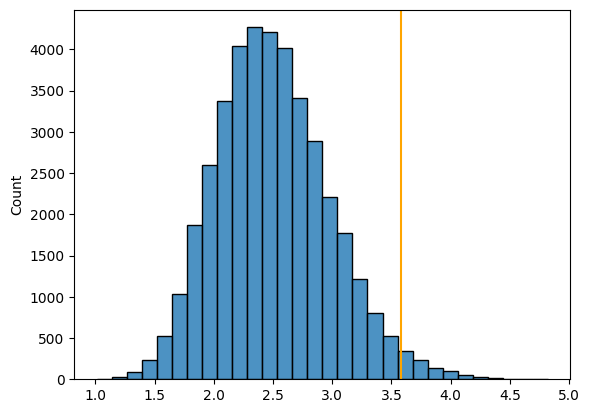

In [20]:
sns.histplot(prediction_loss, bins=30, alpha=0.8)
plt.axvline(x=loss_threshold, color='orange')

In [21]:
threshold_prediction = [0 if i < loss_threshold else 1 for i in prediction_loss]

print(classification_report(y_test, threshold_prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     39608
           1       0.01      0.02      0.01       392

    accuracy                           0.97     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.98      0.97      0.98     40000

